In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


#### Download Dataset from keggale


In [2]:
!pip install opendatasets -q

/Users/chamodyaavishka/anaconda3/envs/NEW/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 5.74MB/s]

In [83]:
data = pd.read_csv("random-linear-regression/test.csv")

In [84]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [85]:
data.shape

(300, 2)

#### Data Preprocess


In [86]:
x = data['x']
y = data['y']


In [87]:
x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [88]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

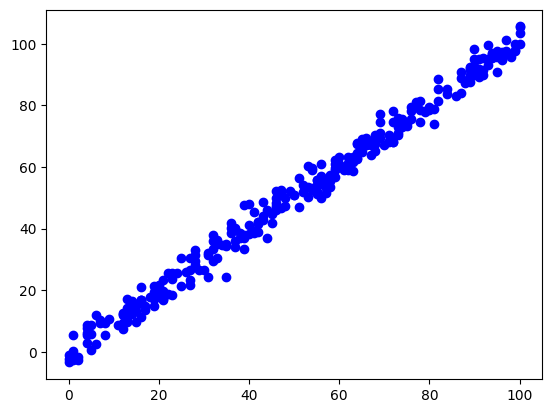

In [89]:
plt.scatter(x, y, c='b')
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train ,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [91]:
x_train.shape, x_test.shape

((240,), (60,))

In [92]:
y_train.shape, y_test.shape

((240,), (60,))

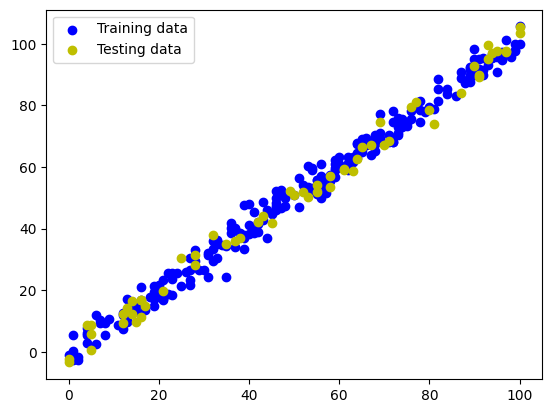

In [93]:
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()


#### Model Building


In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
            metrics = ["mae"])
#traing model
epochs = 4
history =model.fit(tf.expand_dims(x_train, axis=1), y_train , epochs=epochs)

/Users/chamodyaavishka/anaconda3/envs/NEW/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28.2320 - mae: 28.2320  
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 13.3000 - mae: 13.3000
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 4.1124 - mae: 4.1124
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0720 - mae: 4.0720 


In [95]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (168.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28 (116.00 B)

In [96]:
y_pred = model.predict(x_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[86.3674   ],
       [72.99502  ],
       [90.18809  ],
       [ 5.1779265],
       [87.32257  ]], dtype=float32)

In [97]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

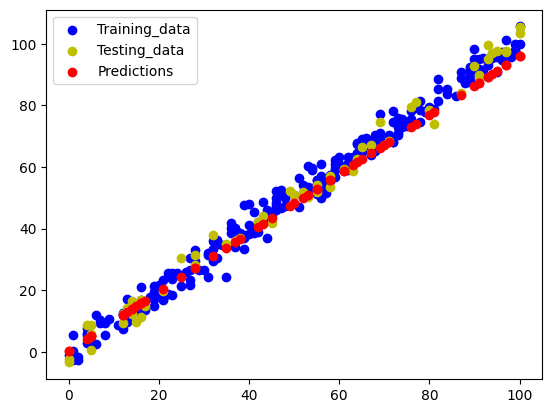

In [98]:
plt.scatter(x_train, y_train, c='b', label='Training_data')
plt.scatter(x_test, y_test, c='y', label='Testing_data')
plt.scatter(x_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

#### Evaluate Model

In [99]:
# Using evaluate method
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3782 - mae: 3.3782 


[3.1486740112304688, 3.1486740112304688]

In [100]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.148674>

In [101]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=16.345755>

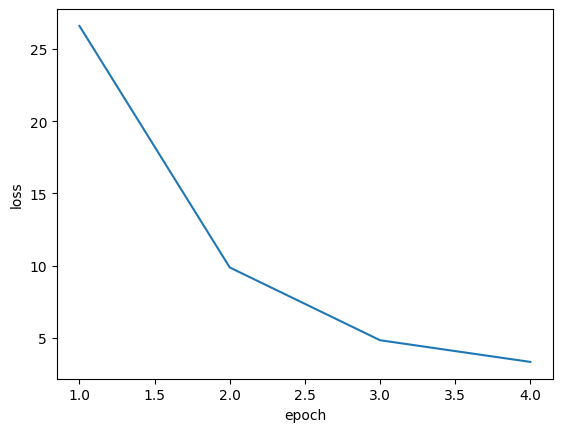

In [102]:
x_range = range(1, epochs+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### Model Weights and Baises

In [103]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 0.01141722 -0.6926587   0.88029194 -0.68968713]] 
Biases:
 [ 0.15617561 -0.13102596 -0.17627676 -0.14024541]

Weights:
 [[ 0.24697062]
 [-0.3666517 ]
 [-0.08186846]
 [-1.1171069 ]] 
Biases:
 [0.14436209]
